**EMPLOYEE SALARY FOR DIFFRENT JOB ROLE**

This dataset provides valuable insights into the compensation and job roles of employees across various industries and regions. It is particularly useful for HR analysts, data scientists, or anyone interested in understanding salary trends. The dataset offers a wealth of information to explore and analyze, making it a rich resource for uncovering trends and patterns in employee compensation.

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
data=pd.read_csv('/content/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [107]:
data.shape

(607, 12)

In [108]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [109]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [110]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [111]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [112]:
#unique values in the dataset
data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


**DESCRIPTIVE STATISTICS**

In [114]:
data.describe()# statistical summary of data

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [115]:
# yearwise number of records
data.work_year.value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

In [116]:
# value counts as per experience level
data.experience_level.value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [117]:
# value counts as per remote ratio

data.remote_ratio.value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [118]:
# value counts as per company size

data.company_size.value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [119]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [120]:
# number of jobs as per job title categorised by employment type

data.groupby('employment_type')['job_title'].value_counts().to_frame()

count
employment_type job_title                                
CT              Applied Machine Learning Scientist      1
                Business Data Analyst                   1
                Staff Data Scientist                    1
                Principal Data Scientist                1
                ML Engineer                             1
...                                                   ...
PT              AI Scientist                            2
                3D Computer Vision Researcher           1
                Computer Vision Engineer                1
                Data Analyst                            1
                ML Engineer                             1

[64 rows x 1 columns]

In [121]:

data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [122]:
# average salary as per job title

data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

<Axes: xlabel='salary_currency', ylabel='count'>

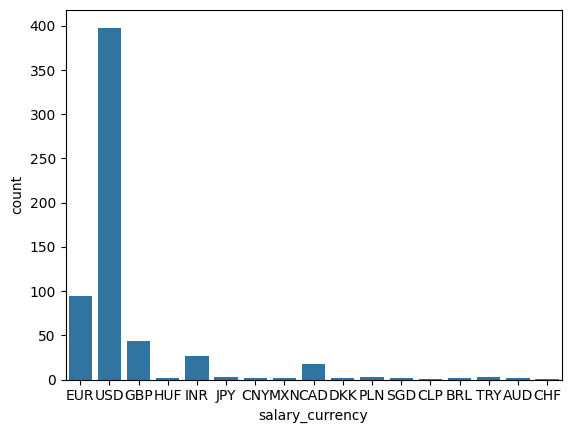

In [123]:
# number of  currency

sns.countplot(data,x='salary_currency')


salary in USD is more prevalent

In [124]:
data['salary_currency'].value_counts()

salary_currency
USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: count, dtype: int64

<Axes: xlabel='work_year', ylabel='count'>

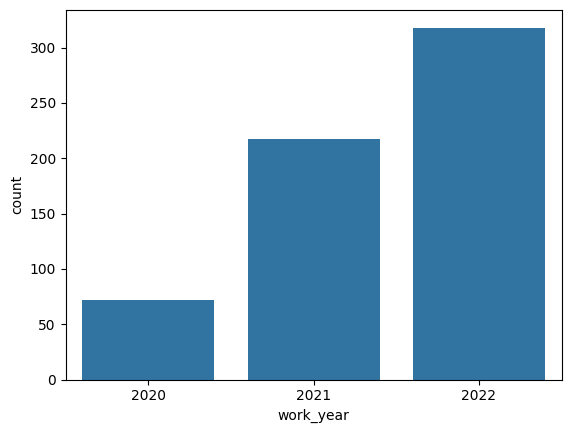

In [125]:
# countplot for work year

sns.countplot(data,x='work_year')

<Axes: xlabel='employment_type', ylabel='count'>

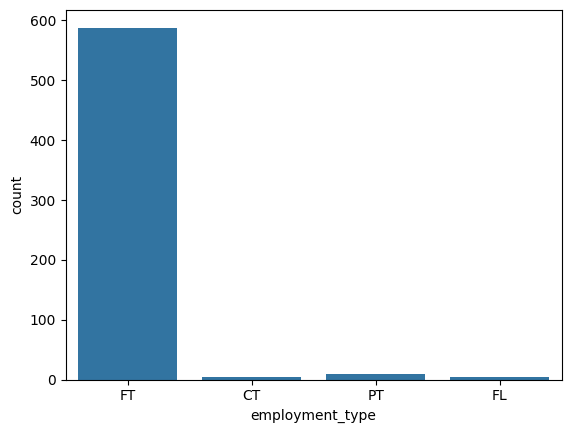

In [126]:
sns.countplot(data,x='employment_type')

<Axes: xlabel='remote_ratio', ylabel='count'>

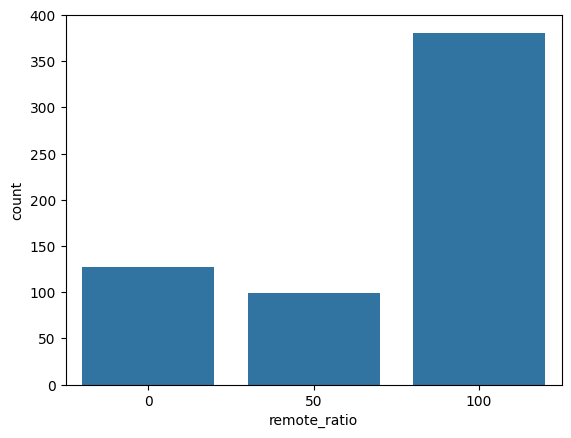

In [127]:
sns.countplot(data,x='remote_ratio')

<Axes: xlabel='company_size', ylabel='count'>

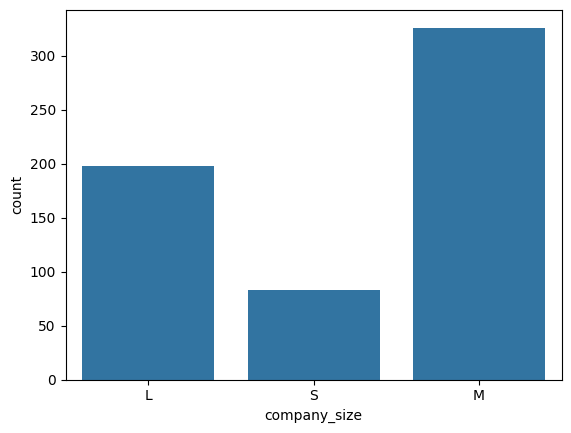

In [128]:
sns.countplot(data,x='company_size')

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

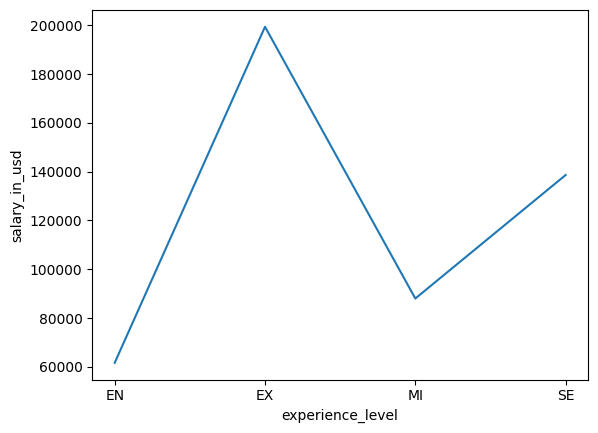

In [129]:
fd=data.groupby('experience_level')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='experience_level',y='salary_in_usd')

In [130]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [131]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

**TOP 10 EXPERIENCE LEVELS BY AVERAGE SALARY**

<ipython-input-132-26687392bae0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='experience_level', y='salary', data=top_10_experience_salary, palette='viridis')


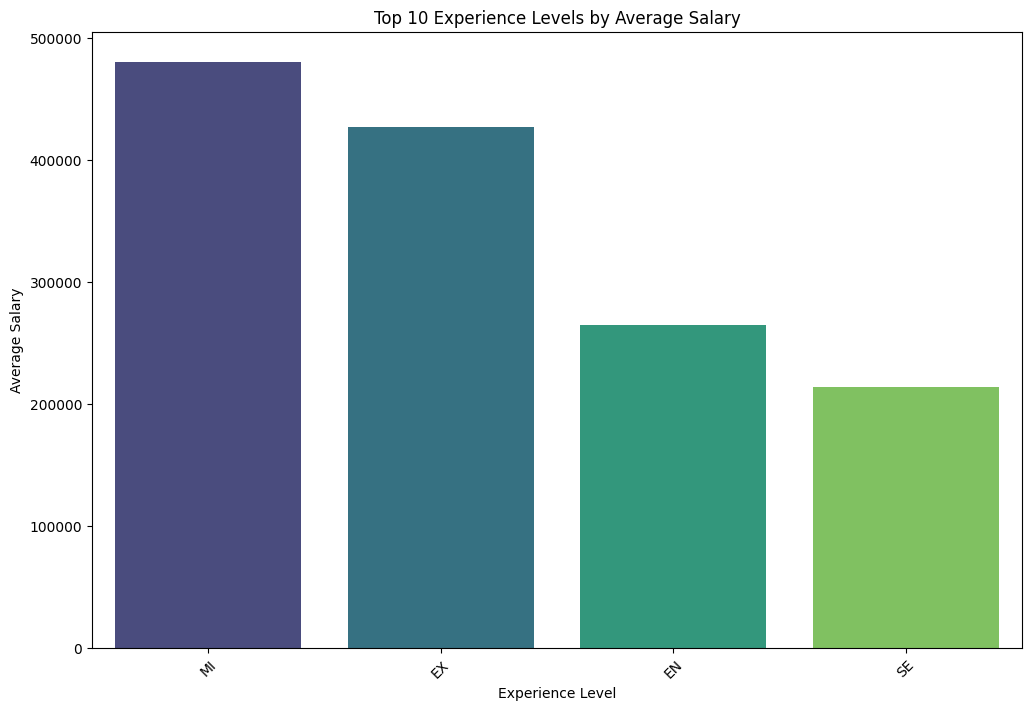

In [132]:
#  Process the data to get the top 10 experience levels by average salary
experience_salary = data.groupby('experience_level')['salary'].mean().reset_index()
top_10_experience_salary = experience_salary.sort_values(by='salary', ascending=False).head(10)

# Step 4: Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(x='experience_level', y='salary', data=top_10_experience_salary, palette='viridis')
plt.title('Top 10 Experience Levels by Average Salary')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

Highest Paying Experience Levels: The bar plot clearly shows the MI experience levels with the highest average salaries,help  to identify which experience levels are the most lucrative.

In [133]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

**TOP 10 JOB TITLES BY SALARY**

<ipython-input-134-04717d499fb4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='job_title', data=top_10_job_salary , palette='viridis')


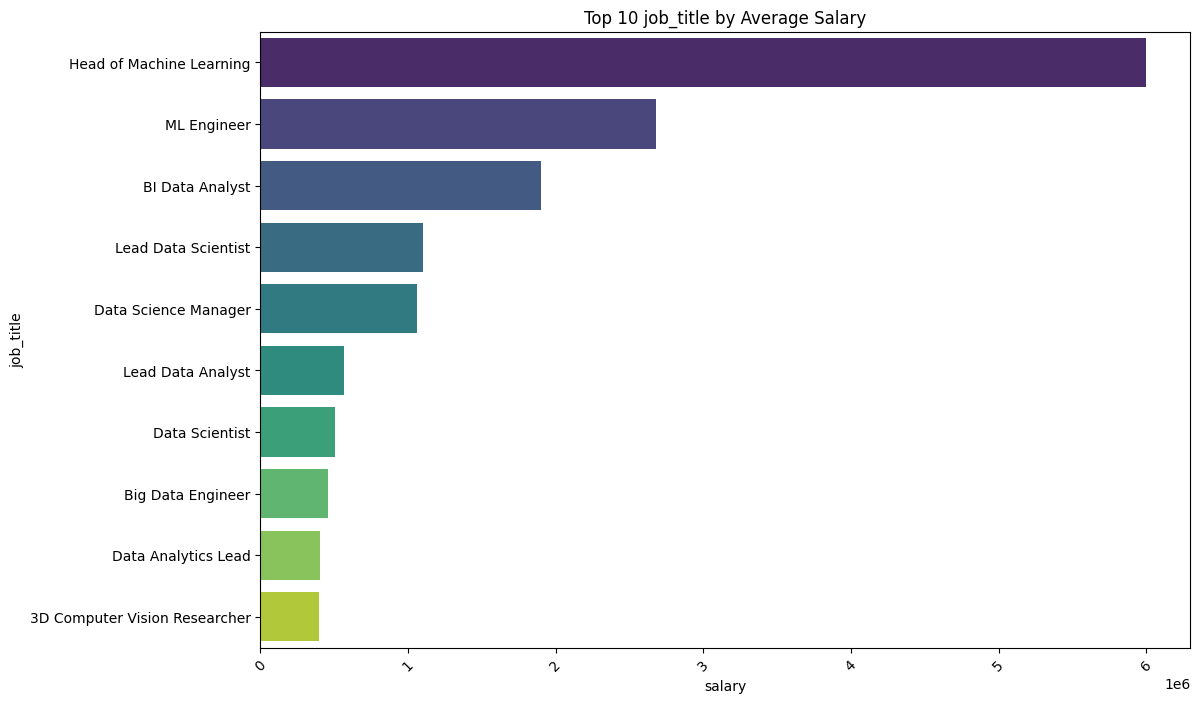

In [134]:
#  Process the data to get the top 10 experience levels by average salary
job_salary = data.groupby('job_title')['salary'].mean().reset_index()
top_10_job_salary = job_salary.sort_values(by='salary', ascending=False).head(10)

# Step 4: Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(x='salary', y='job_title', data=top_10_job_salary , palette='viridis')
plt.title('Top 10 job_title by Average Salary')
plt.xlabel('salary')
plt.ylabel('job_title')
plt.xticks(rotation=45)
plt.show()

**DISTRIBUTION OF EMPLOYMENT TYPES**

In [135]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [136]:
# Process the data to count the occurrences of each employment type
employment_type_counts = data['employment_type'].value_counts().reset_index()
employment_type_counts




,employment_type,count
0,FT,588
1,PT,10
2,CT,5
3,FL,4


In [137]:
employment_type_counts.columns = ['Employment_Type', 'count']
employment_type_counts.columns

Index(['Employment_Type', 'count'], dtype='object')

<ipython-input-138-015e9fa4a470>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Employment_Type', data=employment_type_counts, palette='viridis')


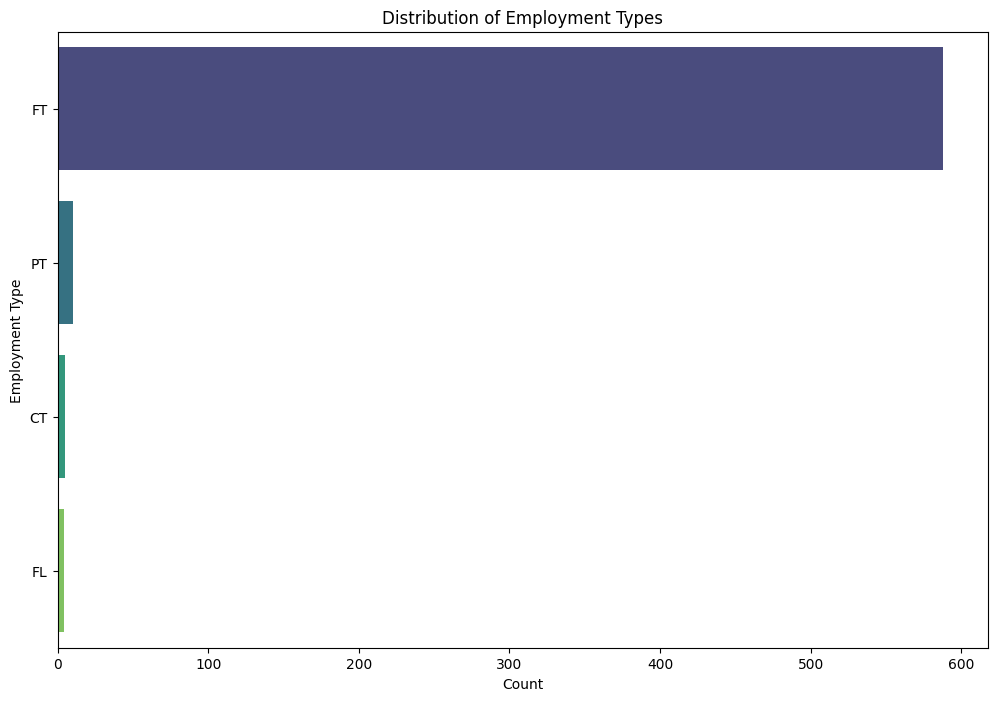

In [138]:
#  Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Employment_Type', data=employment_type_counts, palette='viridis')
plt.title('Distribution of Employment Types')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.show()

**BOXPLOT DISTRIBUTION OF SALARY**

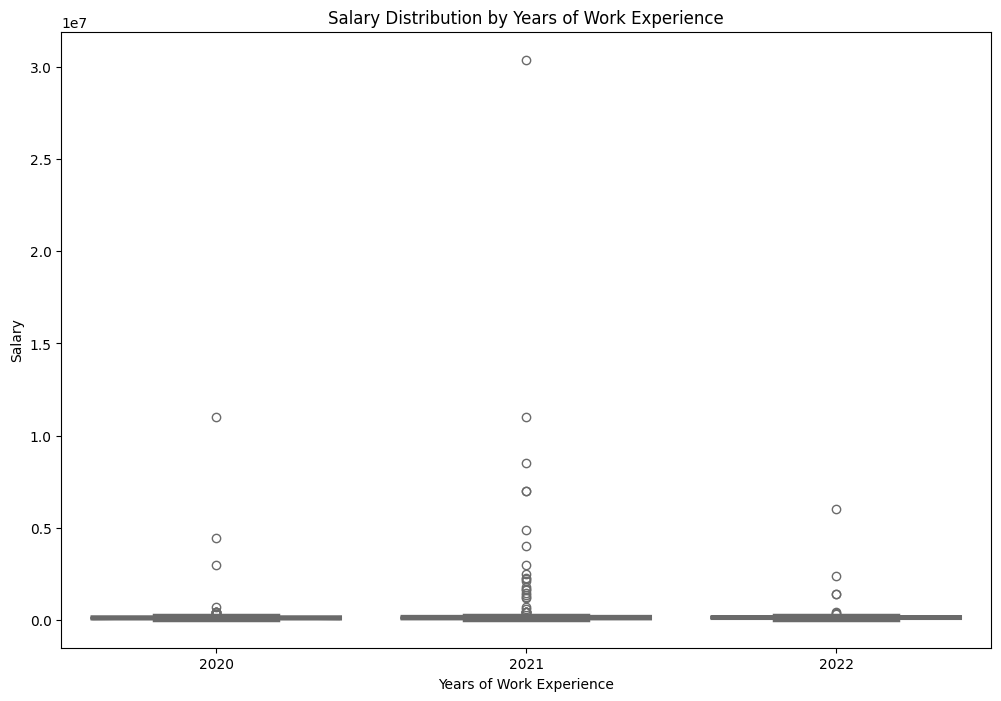

In [139]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='work_year', y='salary', data=data,hue='work_year', palette='Set3',linewidth=2.5,notch=True, legend=False)
plt.title('Salary Distribution by Years of Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Salary')
plt.show()

**DISTRIBUTION OF EXPERIENCE LEVEL**

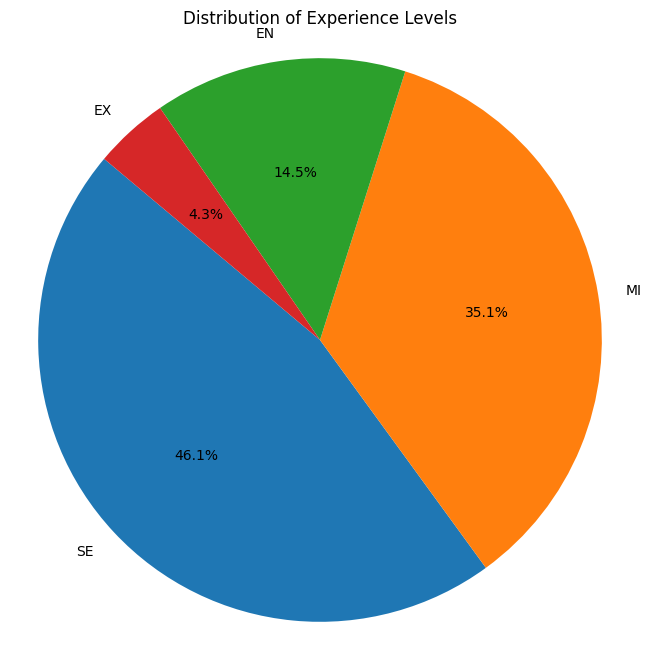

In [140]:
# Calculate counts of each experience level
experience_counts = data['experience_level'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(experience_counts, labels=experience_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Experience Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**ENCODING**

In [141]:
# Select columns with object (categorical) data types
num_cols = data.select_dtypes(include='object').columns.tolist()

# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the selected numerical columns
for x in num_cols:
    data[x] = le.fit_transform(data[x])

# Now, your categorical columns (excluding column 0) have been converted to numerical values
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,70000,7,79833,14,0,12,0
1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2020,3,2,7,85000,8,109024,20,50,18,1
3,2020,2,2,47,20000,16,20000,23,0,20,2
4,2020,3,2,38,150000,16,150000,55,50,48,0


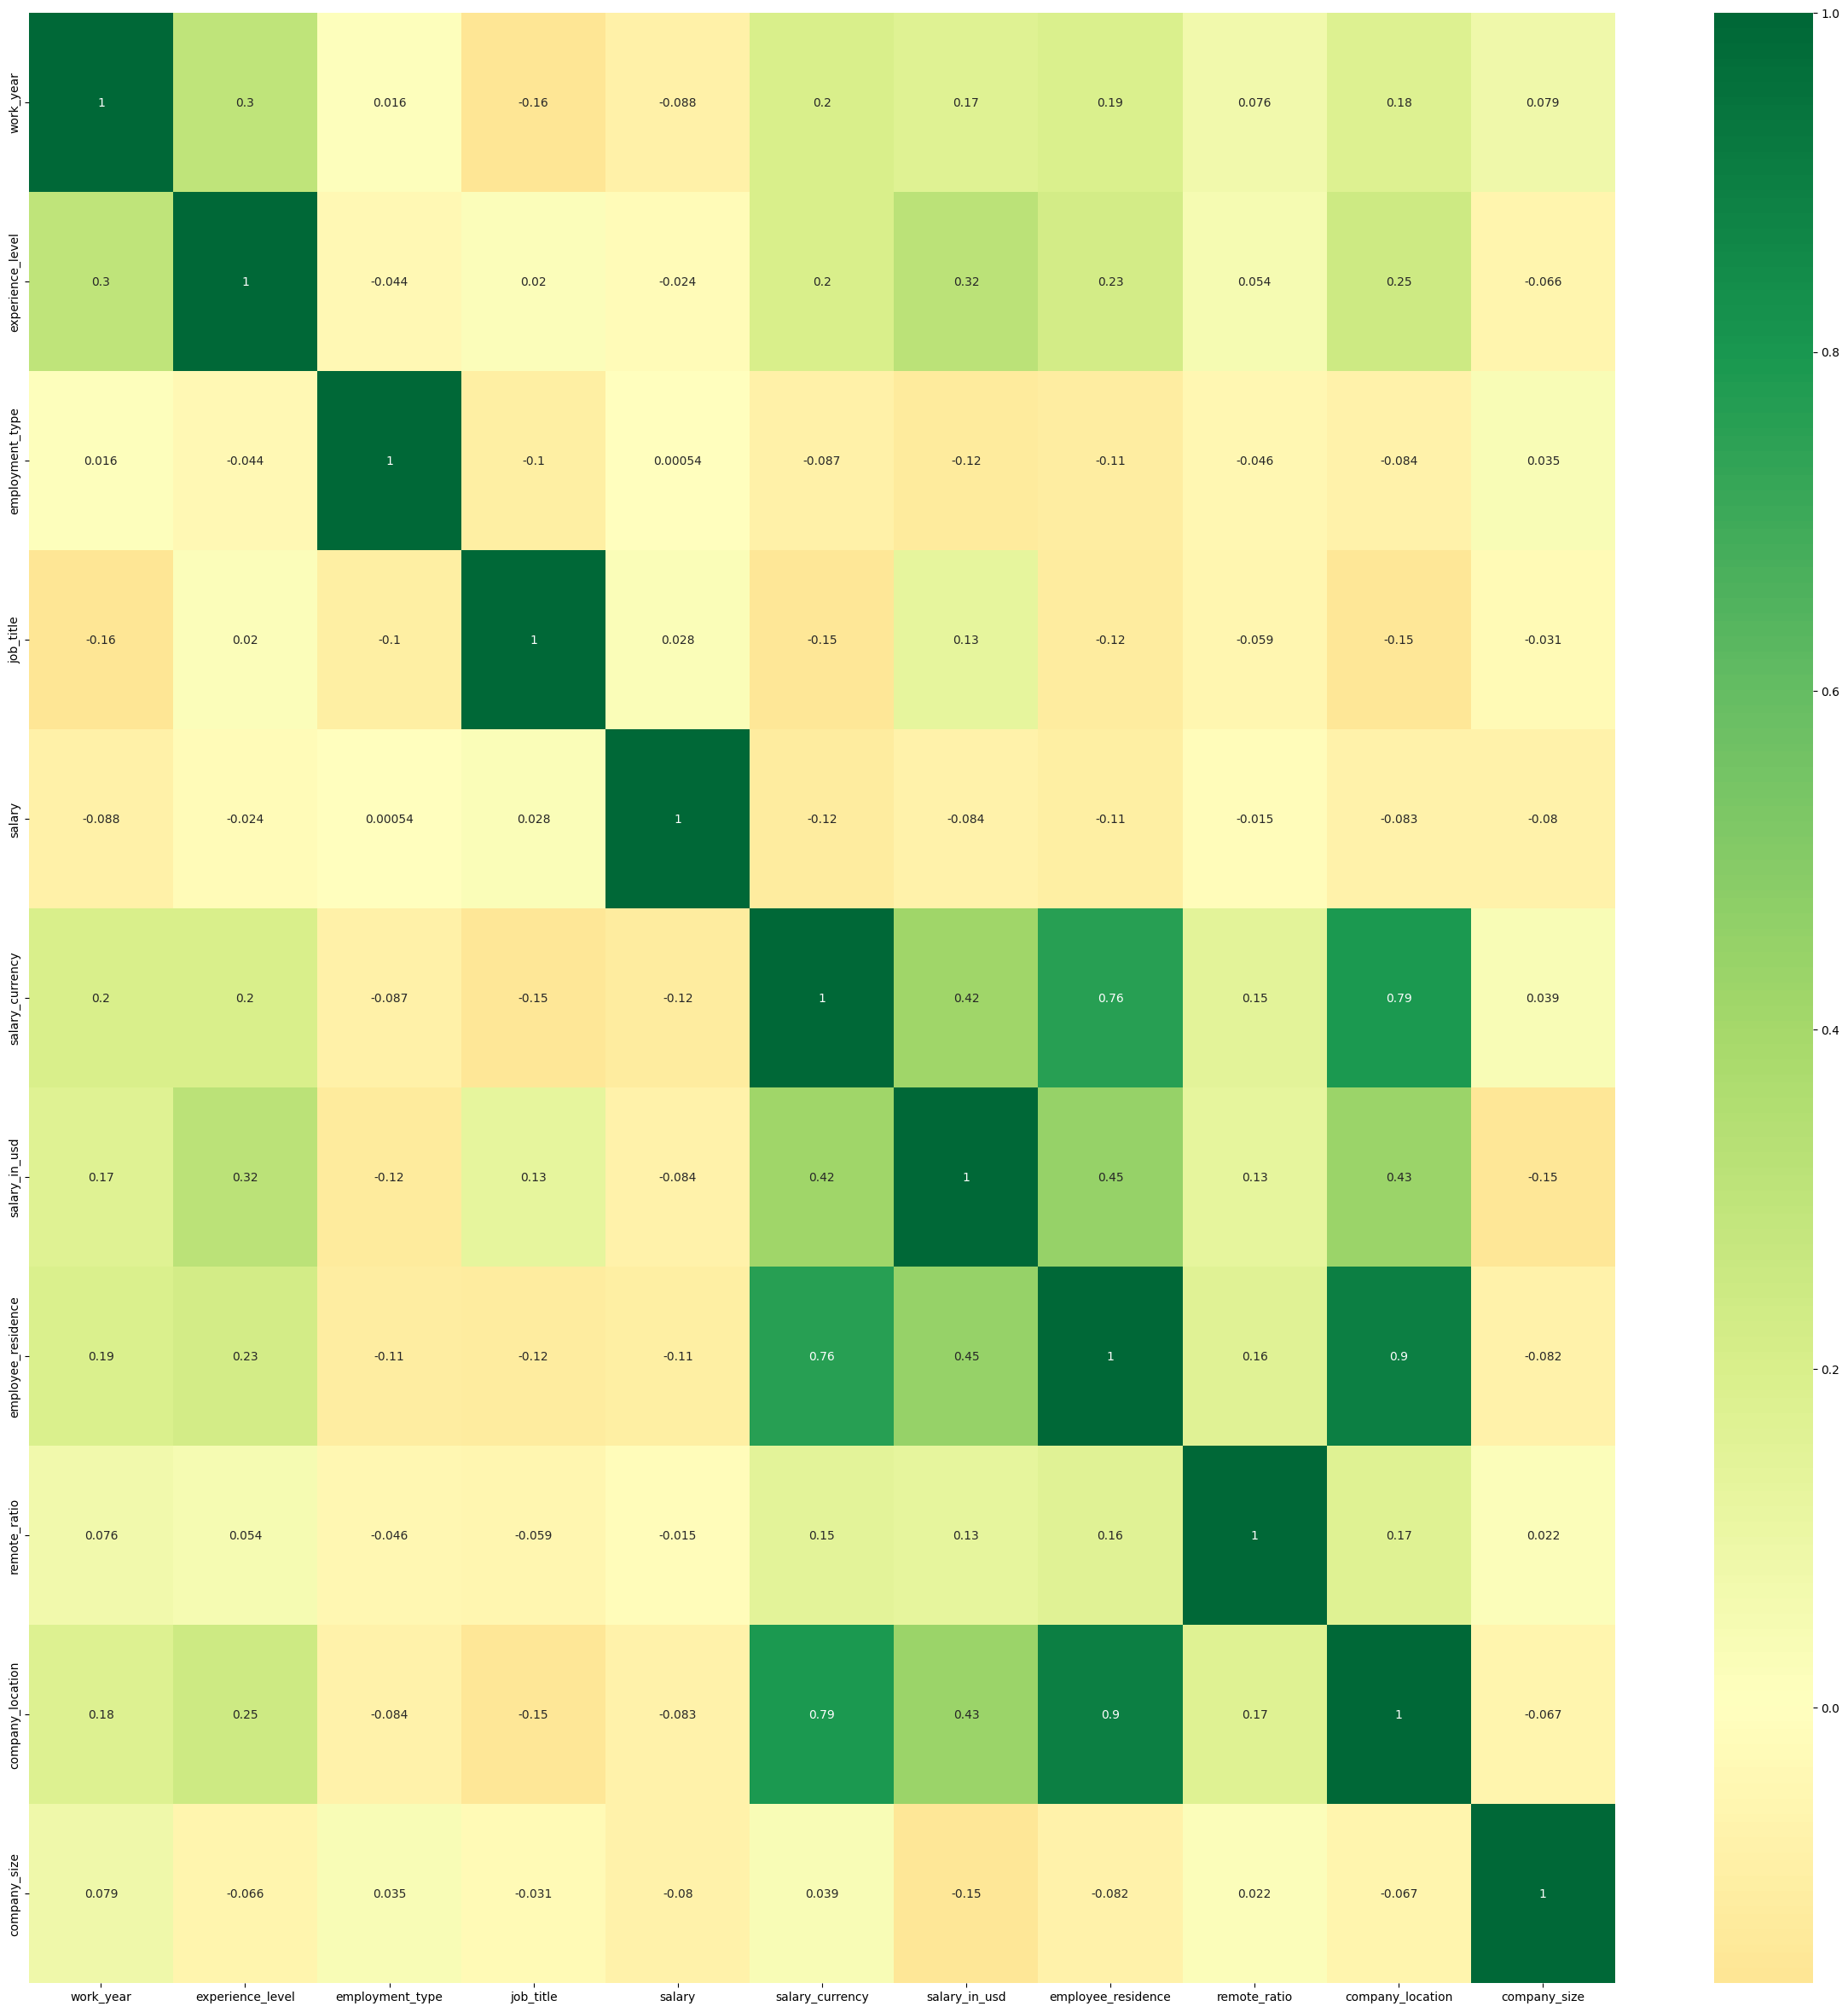

In [142]:
Corr_Matrix = data.corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(Corr_Matrix, annot=True, cmap='RdYlGn', center=0)
plt.show()

In [143]:
print('Top 5 Most Positively Correlated to the To salary_in_usd')
Corr_Matrix['company_location'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the To salary_in_usd


company_location      1.000000
employee_residence    0.897704
salary_currency       0.787084
salary_in_usd         0.428994
experience_level      0.247133
Name: company_location, dtype: float64

In [144]:
print('Top 5 Most Positively Correlated to salary_in_usd ')
Corr_Matrix['salary_in_usd'].sort_values(ascending=True).head(5)

Top 5 Most Positively Correlated to salary_in_usd 


company_size      -0.151205
employment_type   -0.123545
salary            -0.083906
job_title          0.131016
remote_ratio       0.132122
Name: salary_in_usd, dtype: float64

In [145]:
#SPLITTING

In [146]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [147]:
X = data.drop(columns=['salary_in_usd'])
y = data['salary_in_usd']

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [150]:
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (485, 10)
X_test shape: (122, 10)
y_train shape: (485,)
y_test shape: (122,)


In [153]:
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [154]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual_salary'] = y_test
    submit['Predict_salary'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Random Forest:
R2 Score: 0.95
Mean Absolute Error (MAE): 4867.96
Root Mean Squared Error (RMSE): 13654.23
   index  Actual_salary  Predict_salary
0    563         140250       140228.00
1    289         135000       135013.20
2     76         100000        99309.54
3     78         270000       267949.00
4    182          26005        25270.46
----------------------------------------
Gradient Boosting:
R2 Score: 0.97
Mean Absolute Error (MAE): 5046.24
Root Mean Squared Error (RMSE): 10996.11
   index  Actual_salary  Predict_salary
0    563         140250   147057.724138
1    289         135000   133447.488328
2     76         100000    97711.743315
3     78         270000   275128.083444
4    182          26005    24322.600573
----------------------------------------
The best performing model is: GradientBoostingRegressor with accuracy: 0.97
